In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

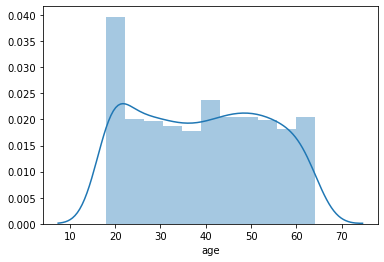

In [6]:
sns.distplot(df['age'])

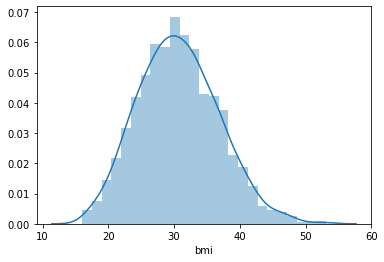

In [7]:
sns.distplot(df['bmi'])

In [8]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [9]:
df['sex']=df['sex'].replace({"female":1,"male":0})

In [10]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,yes,southwest,16884.92
1,18,0,33.8,1,no,southeast,1725.55
2,28,0,33.0,3,no,southeast,4449.46
3,33,0,22.7,0,no,northwest,21984.47
4,32,0,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,no,northwest,10600.55
1334,18,1,31.9,0,no,northeast,2205.98
1335,18,1,36.9,0,no,southeast,1629.83
1336,21,1,25.8,0,no,southwest,2007.95


In [11]:
df['smoker']=df['smoker'].replace({"yes":1,"no":0})

In [38]:
df['region'].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [12]:
le=LabelEncoder()

In [13]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
df[['age','bmi']]=scaler.fit_transform(df[['age','bmi']])

In [14]:
df['region']=le.fit_transform(df['region'])

In [15]:
df

,age,sex,bmi,children,smoker,region,expenses
0,0.021739,1,0.320755,0,1,3,16884.92
1,0.000000,0,0.479784,1,0,2,1725.55
2,0.217391,0,0.458221,3,0,2,4449.46
3,0.326087,0,0.180593,0,0,1,21984.47
4,0.304348,0,0.347709,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,0.695652,0,0.404313,3,0,1,10600.55
1334,0.000000,1,0.428571,0,0,0,2205.98
1335,0.000000,1,0.563342,0,0,2,1629.83
1336,0.065217,1,0.264151,0,0,3,2007.95


In [16]:
x=df[['age','sex','bmi','children','smoker','region']]

In [17]:
y=df['expenses']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr=LinearRegression()

In [21]:
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred=lr.predict(x_test)

In [23]:
from sklearn.metrics import mean_absolute_error

In [24]:
from sklearn.metrics import mean_squared_error
J_mse_sk_LR = mean_squared_error(y_pred, y_test)

# R_square
R_square_sk_LR = lr.score(x_test,y_test)

print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk_LR)
print('R square obtain for scikit learn library is :',R_square_sk_LR)


The Mean Square Error(MSE) or J(theta) is:  35434521.3363801
R square obtain for scikit learn library is : 0.7108819814486128


In [25]:
print('Coefficients: ', lr.coef_)

Coefficients:  [11930.96674752   -98.59635676 11776.62427956   430.46286482
 24469.54443429  -285.29533199]


In [26]:
print('Variance score: {}'.format(lr.score(x_test, y_test)))

Variance score: 0.7108819814486128


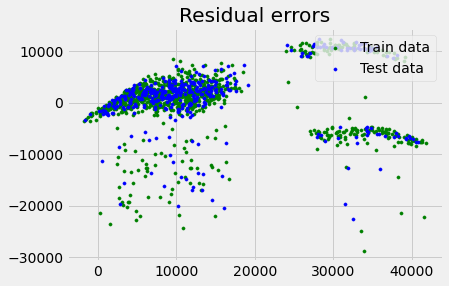

In [27]:
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(lr.predict(x_train), lr.predict(x_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(lr.predict(x_test), lr.predict(x_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [28]:
r2_score=lr.score(x_test,y_test)
print(r2_score*100,'%')

71.08819814486128 %


In [29]:
scor=mean_absolute_error(y_test,y_pred)

In [30]:
scor

4211.793339132547

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf=RandomForestClassifier()

In [33]:
from sklearn.svm import SVR

SVM_R = SVR(kernel='rbf')
SVM_R.fit(x_train, y_train)

y_pred_svm = SVM_R.predict(x_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk_svm = mean_squared_error(y_pred_svm, y_test)

# R_square
R_square_sk_svm = SVM_R.score(x_test,y_test)

print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk_svm)
print('R square obtain for scikit learn library is :',R_square_sk_svm)

The Mean Square Error(MSE) or J(theta) is:  132513408.00996272
R square obtain for scikit learn library is : -0.08120591193079174


In [34]:
sc=SVM_R.predict([[23,0,33,3,1,3]])

In [35]:
sc

array([9455.82090046])

In [36]:
import pickle

In [37]:
file=open('insurance.pkl','wb')
pickle.dump(SVM_R,file)